Osnabrück University - Computer Vision (Winter Term 2021/22) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 03: Morphological Operations¶

## Introduction

This week's sheet should be solved and handed in before the end of **Tuesday, November 23, 2021**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (complex numbers) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *complex number*, what is the *complex plane*, how are complex numbers usually denoted?

YOUR ANSWER HERE

**b)** What is the *real* and the *imaginary* part of a complex number? What is the *absolute value* of a complex number? What is the *complex conjugate*?

YOUR ANSWER HERE

**c)** What are polar coordinates? What are their advantages? Can you convert between cartesian and polar coordinates? Can you write down $i=\sqrt{-1}$ in polar coordinates? What about $\sqrt{i}$?

YOUR ANSWER HERE

**d)** Python, and also numpy, support calculations with complex numbers. Consult the documentation to find out details. Notice that $i$ is substituted by $j$ in Python.

In [5]:
# YOUR CODE HERE

## Assignment 1: Properties of morphological operators [5 Points]

This exercise will elaborate on the basic morphological operators of *erosion* and *dilation* (cf. CV-05 slides 4-14).

### a) Duality

Proof that *erosion* and *dilation* are *dual* operators, i.e.

$$ g^{\ast}\oplus S = (g\ominus S)^{\ast}\qquad\text{and}\qquad
g^{\ast}\ominus S = (g\oplus S)^{\ast}$$

here $g^{\ast}$ denotes the inverted binary image, i.e. $g^{\ast}(x,y) = 1 - g(x,y) = \neg g(x,y)$, i.e. 1-pixel become 0 and 0-pixel become 1.

YOUR ANSWER HERE
$$ g^{\ast}\oplus S = (g\ominus S)^{\ast} $$

$$ \neg (g \ominus S) \\
= \neg(\land\land(S \to g)) \\
= \lor\lor\neg(S\to g) \\
= \lor\lor\neg(\neg S\lor g) \\
= \lor\lor\neg\neg S\land \neg g\\
= \lor\lor S \land \neg g\\
= \neg g \oplus S$$
  
  
  
$$\\g^{\ast}\ominus S = (g\oplus S)^{\ast}$$

$$
= \land\land(S \to\neg g) \\
= \neg\neg(\land\land(S \to\neg g)) \\
= \neg (\lor\lor \neg(S\to\neg g)) \\
= \neg (\lor\lor \neg(\neg S\lor \neg g)) \\
= \neg (\lor\lor \neg\neg S\land\neg\neg g)) \\
= \neg (\lor\lor S\land g)) \\
= (g\oplus S)^{\ast}
$$

### b) Superposition

As *erosion* and *dilation* have been introduced for binary images, the notion of *linearity* is not really appropriate here. However, some weaker version, called *superposition* can be defined: instead of forming linear combination, one takes the logical disjunction:

$$(g_1\lor g_2)(x,y) := g_1(x,y)\lor g_2(x,y)$$

Check for both operations if *erosion* and *dilation* are "compatible" with superposition, i.e. if first *eroding* (or *dilating*) two images and superposing the result is the same as first superposing the images and then *eroding* (or *dilating*) the result.

Dilation:
$$(g_1\lor g_2)(x,y) := g_1(x,y)\lor g_2(x,y) \\
(g_1 \lor g_2)\oplus S = (g_1\oplus S)\lor(g_2\oplus S)$$
  
    
  
$$ (g_1\oplus S)\lor(g_2\oplus S) \\
= (\lor\lor S\land g_1) \lor (\lor\lor S \land g2) \\
= \lor\lor (S\land g_1) \lor (S\land g_2) \\
= \lor\lor S\land (g_1 \lor g_2) \\
= (g_1 \lor g_2)\oplus S$$

Dilation compatible with superposition: True
Erosion compatible with superposition: False


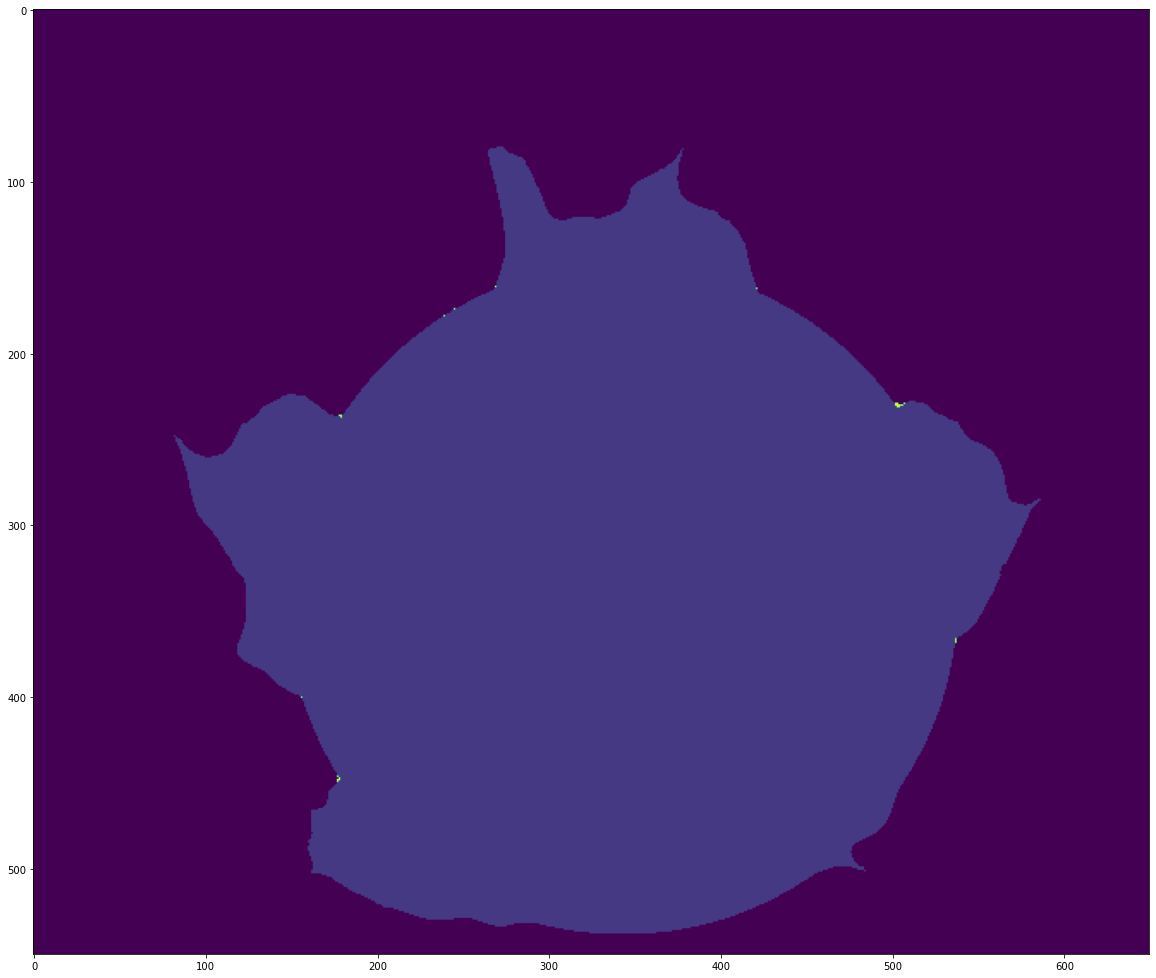

In [6]:
# YOUR CODE HERE
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
from skimage import morphology
import scipy.ndimage.morphology as morph

img1 = imread("kreis.png") > 0
img2 = imread("engelstrompete.png") > 0

s=morphology.disk(5)

same  = morph.binary_erosion((img1 | img2),s) == morph.binary_erosion(img1,s)| morph.binary_erosion(img2,s)

print("Dilation compatible with superposition:", np.array_equal(morph.binary_dilation((img1 | img2),s), morph.binary_dilation(img1,s)| morph.binary_dilation(img2,s)))
print("Erosion compatible with superposition:", np.array_equal(morph.binary_erosion((img1 | img2),s), morph.binary_erosion(img1,s)| morph.binary_erosion(img2,s)))

plt.figure(figsize=(20,20))
plt.imshow((morph.binary_erosion((img1 | img2),s) ^ (morph.binary_erosion(img1,s)| morph.binary_erosion(img2,s))) + 0.2*morph.binary_erosion((img1 | img2),s))
plt.show()

### c) Chaining

Show that *dilation* and *erosion* have the following properties: given two structering elements $S_1$ and $S_2$, it holds

\begin{align}
  (g\oplus S_1)\oplus S_2 & & = & g\oplus (S_1\oplus S_2) && = (g\oplus S_2)\oplus S_1 \\
  (g\ominus S_1)\ominus S_2 & & = & g\ominus (S_1\ominus S_2) && = (g\ominus S_2)\ominus S_1 \\  
\end{align}

What are the practical consequences?

$$ (g\ominus S_1)\ominus S_2 =  g\ominus (S_1\oplus S_2)$$

Erosion: 
\begin{align}
_1(g\ominus S_1)\ominus S_2 & & = _2& g\ominus (S_1\ominus S_2) && = _3(g\ominus S_2)\ominus S_1 \
\end{align}

$$_1 (\land\land (S_1 \to g))\ominus S_2 = $$
$$ = \land\land (\neg S_1\lor g) \ominus S_2 = $$
$$ = \land\land (S_2 \to (\land\land (\neg S_1\lor g)) = $$
$$ = \land\land (\neg S_2 \lor (\land\land (\neg S_1\lor g))$$

$$_2 g \ominus (\land\land (S_2 \to S_1)) = $$
$$ = g \ominus (\land\land (\neg S_2 \lor S_1)) = $$
$$ = \land\land (\land\land (\neg S_2 \lor S_1)) \to g = $$
$$ = \land\land\neg (\land\land (\neg S_2 \lor S_1)) \lor g = $$
$$ = \land\land(\land\land \neg (\neg S_2 \lor S_1)) \lor g = $$
$$ = \land\land(\land\land (\neg\neg S_2 \lor \neg S_1)) \lor g = $$
$$ = \land\land(\land\land (S_2 \lor \neg S_1)) \lor g = $$

$$_3 \land\land (S_2 \to g) \ominus S_1 = $$
$$ = \land\land (\neg S_2 \lor g) \ominus S_1 = $$
$$ = \land\land (S_1 \to (\land\land (\neg S_2 \lor g)) = $$
$$ = \land\land (\neg S_1 \lor (\land\land (\neg S_2 \lor g)) = $$

1: $\neg S_1, \neg S_2, g$

2: $\neg S_1, S_2, g$

3: $\neg S_1, \neg S_2, g$

1 and 3 are not compatible with 2 $$1, 3 \not= 2$$

Dilation

$$ (g\oplus S1) \oplus S2 = g \oplus (S1 \oplus S2)  = (g\oplus S2) \oplus S1 $$

1.  $$ (\lor \lor (S1 \land g) ) \oplus S2 $$
$$ = \lor \lor (S2 \land (\lor \lor(S2 \land g) ) ) $$

2. $$ ( g \oplus (\lor \lor(S2 \land S1)) $$
$$ = \lor \lor ( \lor \lor(S2 \land S1)) \land g) $$

3. $$( \lor \lor (S1 \land g)) \oplus S1$$
$$\lor \lor (S1 \land ((S2 \land g)))$$

 Like in logic : for S1 and S2 and g  to be true everything without exception must be true and order is not important.


## Assignment 2: Application [5 Points]


### a) Boundary extraction

Extract the boundary of a shape using opening or closing. You may use `binary_dilation` or `binary_erosion` from `scipy.ndimage.morphology`. Can you achieve a thicker boundary?

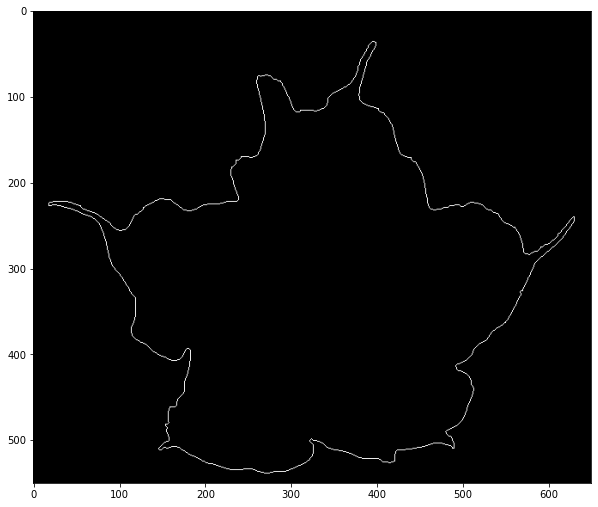

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
import scipy.ndimage.morphology as morph
from imageio import imread

def my_boundary(img):
    """
    Compute boundary of binary image.

    Parameters
    ----------
    img : ndarray of bools
        A binary image.
        
    Returns
    -------
    boundary : ndarray of bools
        The boundary as a binary image.
    """
    
    boundary = np.zeros(img.shape, bool)
    # YOUR CODE HERE
    boundary = img ^ morph.binary_erosion(img)
    
    # thicker boundary
    #boundary = morph.binary_dilation(boundary)
    
    return boundary
    
img = imread("engelstrompete.png") > 0
plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(my_boundary(img))
plt.show()

### b)  Distance transform

Implement distance transform according to the ideas of (CV-05 slides 34ff).  Discuss the effect of different structuring elements.

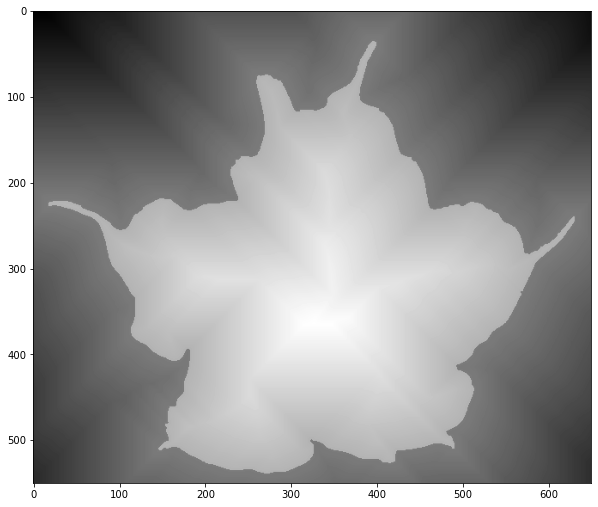

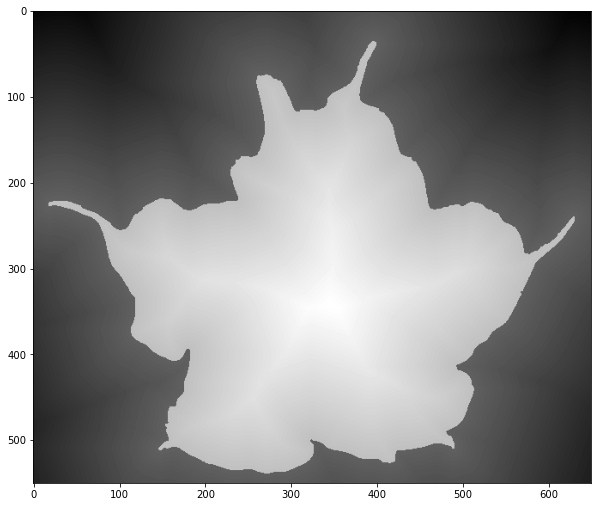

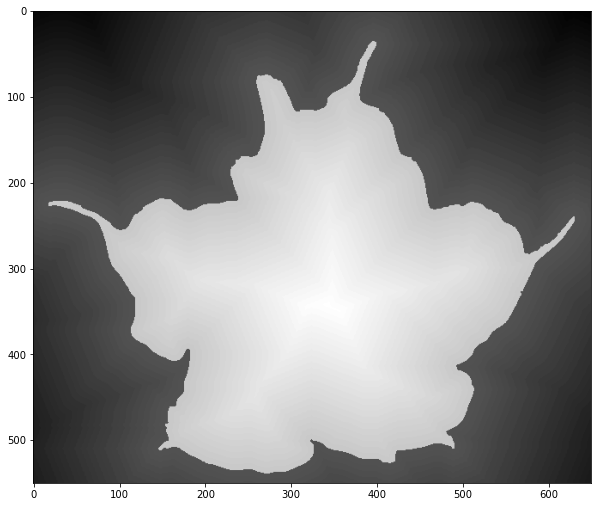

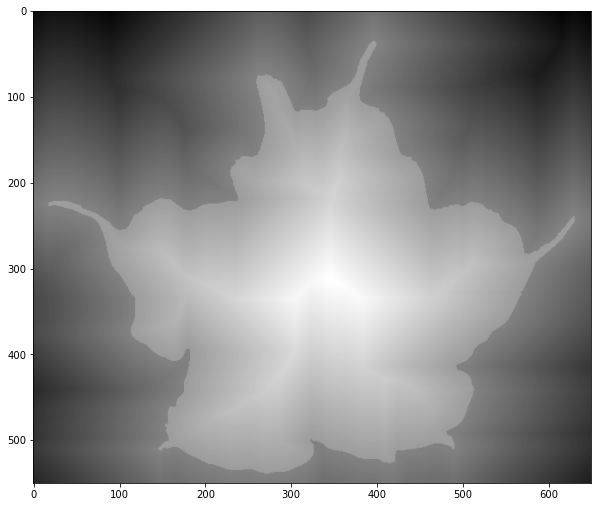

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import morphology as morph, generate_binary_structure
from imageio import imread
from skimage import morphology

def my_distance_transform(img, structure=morphology.square(5), general=True):
    """Distance transform of binary image.

    Args:
    img (ndarray of bools): A binary image.
        
    Returns:
    dt (ndarray of ints): The distance transform of the input image.
    """
    original = np.copy(img)
    dt = np.zeros(img.shape,np.int32)
    # YOUR CODE HERE
    n = 0
    while np.any(img):
        boundary = img ^ morph.binary_erosion(img, structure)
        dt[boundary] = n
        img = img ^ boundary
        n += 1
    
    if general:
        n=0
        img = original
        while np.any(~img):
            boundary = img ^ morph.binary_dilation(img, structure)
            dt[boundary] = n
            img = img ^ boundary
            n -= 1

    # normalize
    #dt = dt + np.abs(np.min(dt))

    return dt


img = imread("engelstrompete.png") > 0
plt.figure(figsize=(10,10))
plt.imshow(my_distance_transform(img) + 50 * img)
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(my_distance_transform(img, morphology.disk(5)) + 50 * img)
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(my_distance_transform(img, morphology.star(5)) + 50 * img)
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(my_distance_transform(img, None) + 50 * img)
plt.show()

Using different structing elements results in different distance transforms as different structuring elements affect the image differently in erosion and dilation. Therefore the iteratively computed boundaries are different and so are the distances.

### c) Morphing

Write a function `my_morph` that implements morphing according to (CV-05 slide 41). You may use your function `my_distance_transform` from part b), or the function `distance_transform_edt` from `scipy.ndimage.morphology`.

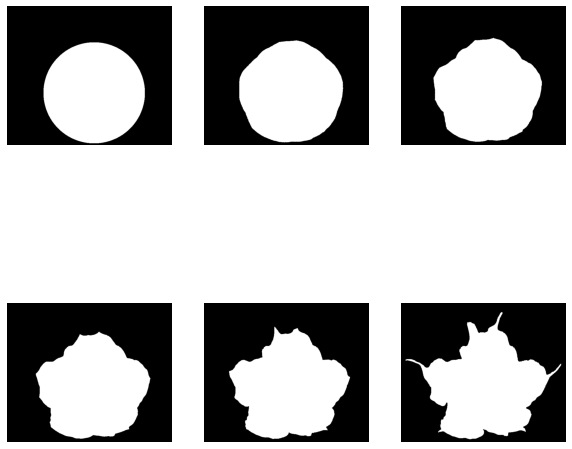

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.morphology as morph
from imageio import imread


def my_morph(A,B,ratio):
    """Morphing from binary image A to image B.

    Args:
        A (ndarray of bools): A binary image (start).
        B (ndarray of bools): A binary image (target), same shape as A.
        ratio (float from 0.0 to 1.0): The ratio of image A and image B.
            0.0=only image A, 1.0=only image B.
        
    Returns:
        morph (ndarray of bools): A binary intermediate image between A and B.
        
    """
    # YOUR CODE HERE
    da = morph.distance_transform_edt(A)
    da = np.where(da != 0, da, -1*morph.distance_transform_edt(~A))
    db = morph.distance_transform_edt(B)
    db = np.where(db != 0, db, -1*morph.distance_transform_edt(~B))
    N=100
    i=ratio*N
    di = (i*db + (N-i)*da)/N
    di = di > 0   
    
    return di

img1 = imread("kreis.png") > 0
img2 = imread("engelstrompete.png") > 0


plt.figure(figsize=(10,10))
plt.gray()
for i, ratio in enumerate(np.linspace(0, 1, 6), 1):
    plt.subplot(2, 3, i)
    plt.imshow(my_morph(img1, img2, ratio))
    plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


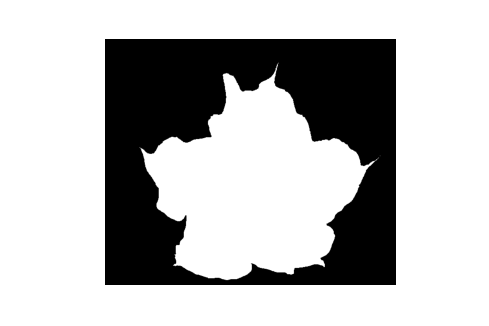

C:\Users\lisag\miniconda3\envs\cv\lib\site-packages\matplotlib\animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


In [16]:
# If you want to see your morph as an animation, run this cell. 
# Close the output (press the blue "Stop interaction" button) once you are done!

# Due to some matplotlib problem you may have to restart your kernel!
%matplotlib notebook
import matplotlib.animation as animation
fig = plt.figure()

ims = []
for i, ratio in enumerate(np.linspace(0, 1, 24), 1):
    plt.axis('off')
    im = plt.imshow(my_morph(img1, img2, ratio), cmap='gray', animated=True)
    ims.append([im])  
    
ani = animation.ArtistAnimation(fig, ims + list(reversed(ims)), interval=100, blit=True)

fig.show()

## Assignment 3: Implementation: Skeletonization [5 Points]

### a) Skeletonization with hit-or-miss

Explain in your own words, how the hit-or-miss operator can be used for skeletonization (cf CV-05 slide 49).  

Hit-or-miss is an operation used to define a pattern in the image. This is made by two principles, hit and miss. 'Hit' detects all image patches that show a specific shape perfectly location and removes all smaller zones smaller than the specific shape with erotion. The 'miss' part of this operation removes all locations where the pattern in the specific shape cannor be found. This is accomplished by inverting the eroded binary input image. With both 'hit' and 'miss' the intersection of both is calculated and anchor the specific shape.

In skeletonization the hit-or-miss operator is used to find the ridges in the distance transform of an image. Eight hit-or-miss operations (for left, right, up, down, and the diagonals) are applied iteratively to remove all pixels that are not part of the ridges. The ridge obtained through this method corresponds to the skeleton.

### b) Implementation of skeletonization

Now use this method to implement your own skeletonization function. It is ok to use
`scipy.ndimage.morphology.binary_hit_or_miss` here (but of course *not* `skimage.morphology.skeletonize` or similar functions). Compare your result with (CV-05 slide 50). Note that computing the skeleton using this method may take some time ...

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.morphology as morph
from imageio import imread

def my_skeletonize(img):
    """
    Compute the skeloton of a binary image using hit_or_miss operator.
    
    Parameters
    ----------
    img : ndarray of bools
        Binary image to be skeletonized.
    
    Returns
    -------
    skeleton : ndarray of bools
        The skeleton of the input image.
    """

    
    # YOUR CODE HERE
    sl_h=[[0,0,1],[0,1,1],[0,0,1]]
    sl_m=[[1,0,0],[1,0,0],[1,0,0]]
    
    sr_h=[[1,0,0],[1,1,0],[1,0,0]]
    sr_m=[[0,0,1],[0,0,1],[0,0,1]]

    so_h=[[0,0,0],[0,1,0],[1,1,1]]
    so_m=[[1,1,1],[0,0,0],[0,0,0]]
    
    su_h=[[1,1,1],[0,1,0],[0,0,0]]
    su_m=[[0,0,0],[0,0,0],[1,1,1]]
    
    
    slu_h=[[0,1,1],[0,1,1],[0,0,0]]
    slu_m=[[0,0,0],[1,0,0],[1,1,0]]
    
    slo_h=[[0,0,0],[0,1,1],[0,1,1]]
    slo_m=[[1,1,0],[1,0,0],[0,0,0]]
    
    sru_h=[[1,1,0],[1,1,0],[0,0,0]]
    sru_m=[[0,0,0],[0,0,1],[0,1,1]]
    
    sro_h=[[0,0,0],[1,1,0],[1,1,0]]
    sro_m=[[0,1,1],[0,0,1],[0,0,0]]
    
    hms = [(sl_h, sl_m), (sr_h, sr_m), (so_h, so_m), (su_h, su_m), (slu_h, slu_m), (slo_h, slo_m), (sru_h, sru_m), (sro_h, sro_m)]

    copy = np.copy(img)
    for i in range(int(np.max(my_distance_transform(img, None)))):
        for (hit, miss) in hms:
            copy = copy ^ morph.binary_hit_or_miss(copy, hit, miss)

    return copy
        
img = imread("images/engelstrompete.png") > 0
skel = my_skeletonize(img)
result = morph.distance_transform_cdt(img, metric='taxicab') + (50 * img)
result[morph.binary_dilation(skel)] = 0
plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(result)
plt.show()

FileNotFoundError: No such file: 'C:\Users\lisag\Computer Vision exercises\4\images\engelstrompete.png'

## Assignment 4: Custom Structuring Element [5 points]

Landsat 7 is a satelite mission for acquisition of satellite imagery of Earth. Unfortunately the Scan Line Corrector failed, resulting in black stripes on the aquired images. More information: https://landsat.usgs.gov/slc-products-background


### a) A first fix

A rather crude fix is to apply a custom structuring element for dilation and erosion (see CV-05, 24ff). Complement the code below (in part (b)) in the following way:
* Rotate the image such that the gaps are horizontal.
* Dilate the rotated image with a vertical structuring element. I.e. take the maximum of an area of size $7 \times1$ and assign it to the center pixel. Repeat for all pixels.
* Erode the dilated image.
* Rotate the result back.

Remark: this exercise applies morphological operator to color images. This extends the idea of generalizing morphological operators to gray value images (CV-05, slide 51).  

### b) Improving the solution
You may get better results by thresholding and applying the morphological operations only to pixels below a threshold, i.e. gap pixels. Compliment your solution from a). 

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.morphology as morph
import scipy.ndimage as ndimg
from skimage import color
from skimage.transform import rescale as rescale
from imageio import imread


angle = 15
thresh = .3
struc_elem = np.ones((5,1), dtype=bool)

img = imread("images/landsat_stack2.png")
img2 = img.copy()
img3 = img.copy()

# YOUR CODE HERE
img = (img - np.min(img))/np.ptp(img)
img3 = (img3 - np.min(img3))/np.ptp(img3)
t = ndimg.rotate(img, angle)
# dilate for every color seperately
for color in range(t.shape[2]):
    t[:,:,color] = ndimg.grey_dilation(t[:,:,color], size=(7, 1), structure=np.ones((7, 1)))
    t[:,:,color] = ndimg.grey_erosion(t[:,:,color], size=(7, 1), structure=np.ones((7, 1)))

t = ndimg.rotate(t, -angle)

# crop to original size
x = int((t.shape[0]-img.shape[0])/2)
y = int((t.shape[1]-img.shape[1])/2)
t = t[x:x+img.shape[0], y:y+img.shape[1], :]

thresh_img = img.copy()
thresh_img[thresh_img<thresh] = t[thresh_img<thresh]

plt.figure(figsize=(15,45))
plt.subplot(3,1,1); plt.imshow(img); plt.axis('off')
plt.subplot(3,1,2); plt.imshow(t); plt.axis('off')
plt.subplot(3,1,3); plt.imshow(thresh_img); plt.axis('off')
plt.imshow(thresh_img)
plt.show()


### c) Bonus
Can you think of (and implement) other ways to add the missing data? 


YOUR ANSWER HERE